# Seoul Bike Station EDA

## Intro

The city of Seoul has recently been releasing a gigantic amount of open data. Out of them all, I was most familiar and interested in the seoul bike (a.k.a Ddareungi prounced "tha-reung-ee") data set.

A brief background of Seoul bike, anyone can rent a bike for $1 per hour anywhere in Seoul! 

I have always had a great experience riding seoul bikes and would love to do an in-depth EDA on it. I might be able to inform my friends of some trivia that I found from this analysis. 

I have a few ideas which I can't cover all in just one post, so please stay tuned for next episodes to come :)


## Data

In this post, I will be looking at bike stations installed across the city of Seoul.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import missingno as mnso
import warnings
warnings.filterwarnings('ignore')

In [2]:
import json
geo_path = 'C:\\Users\\82104\\Desktop\\New_Seoul_Bike\\Data\\Station\\seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [3]:
s_eng = pd.read_csv('C:\\Users\\82104\\Desktop\\New_Seoul_Bike\\Data\\Station\\Seoul_Distict_ID_English.csv', encoding = 'euc-kr')
s_eng.head()

,county_id,county,county_eng,lat,long
0,11320,도봉구,Dobong,37.665861,127.031767
1,11380,은평구,Eunpyeong,37.617612,126.922700
2,11230,동대문구,Dongdaemun,37.583801,127.050700
3,11590,동작구,Dongjak,37.496504,126.944307
4,11545,금천구,Geumcheon,37.460097,126.900155


In [4]:
s_eng = s_eng.drop(columns=['county_id','lat','long'])
s_eng.head()

,county,county_eng
0,도봉구,Dobong
1,은평구,Eunpyeong
2,동대문구,Dongdaemun
3,동작구,Dongjak
4,금천구,Geumcheon


In [5]:
s_kr = pd.read_csv('C:\\Users\\82104\\Desktop\\New_Seoul_Bike\\Data\\Station\\station_df_facilities_info.csv', encoding = 'cp949')
s_kr.head()

,station_id,station_name,county,lat,long,station_install_date,capa,rent_type,dong,bus_min_dist,num_bus_within_150m,subway_500m,culture_500m,school_500m,market_500m,tour_500m
0,301,경복궁역 7번출구 앞,종로구,37.575794,126.971451,10/7/2015,16,LCD,사직동,6.227948,6,1,27,1,0,5
1,302,경복궁역 4번출구 뒤,종로구,37.575947,126.974060,10/7/2015,12,LCD,사직동,177.122548,0,1,40,0,0,6
2,303,광화문역 1번출구 앞,종로구,37.571770,126.974663,10/7/2015,8,LCD,사직동,158.514083,0,2,47,1,0,4
3,304,광화문역 2번출구 앞,종로구,37.572113,126.977577,1/26/2021,7,QR,사직동,32.828601,6,1,44,1,0,1
4,305,종로구청 옆,종로구,37.572582,126.978355,10/7/2015,16,LCD,종로1.2.3.4가동,93.442665,2,2,51,0,0,2


In [6]:
s_kr.shape

(2154, 16)

In [7]:
station = pd.merge(s_eng, s_kr, how = "inner", on = "county")
station.head()

,county,county_eng,station_id,station_name,lat,long,station_install_date,capa,rent_type,dong,bus_min_dist,num_bus_within_150m,subway_500m,culture_500m,school_500m,market_500m,tour_500m
0,도봉구,Dobong,1702,녹천역 1번출구 앞,37.646172,127.050560,5/8/2017,10,LCD,번1동,65.854878,1,1,0,5,0,0
1,도봉구,Dobong,1703,도봉산광역환승센터앞,37.689720,127.045197,5/11/2017,15,LCD,창1동,62.015531,6,2,0,1,0,1
2,도봉구,Dobong,1705,도봉구청 정문앞,37.669224,127.046516,5/8/2017,8,LCD,도봉1동,30.788507,5,1,1,2,0,1
3,도봉구,Dobong,1706,기업은행 앞,37.665665,127.042671,6/27/2017,10,LCD,방학1동,33.531927,4,1,1,1,0,3
4,도봉구,Dobong,1707,도봉구민회관,37.654461,127.038513,5/8/2017,15,LCD,방학1동,31.866318,5,0,6,5,0,2


In [8]:
print (s_kr.shape, station.shape)

(2154, 16) (2154, 17)


<AxesSubplot:>

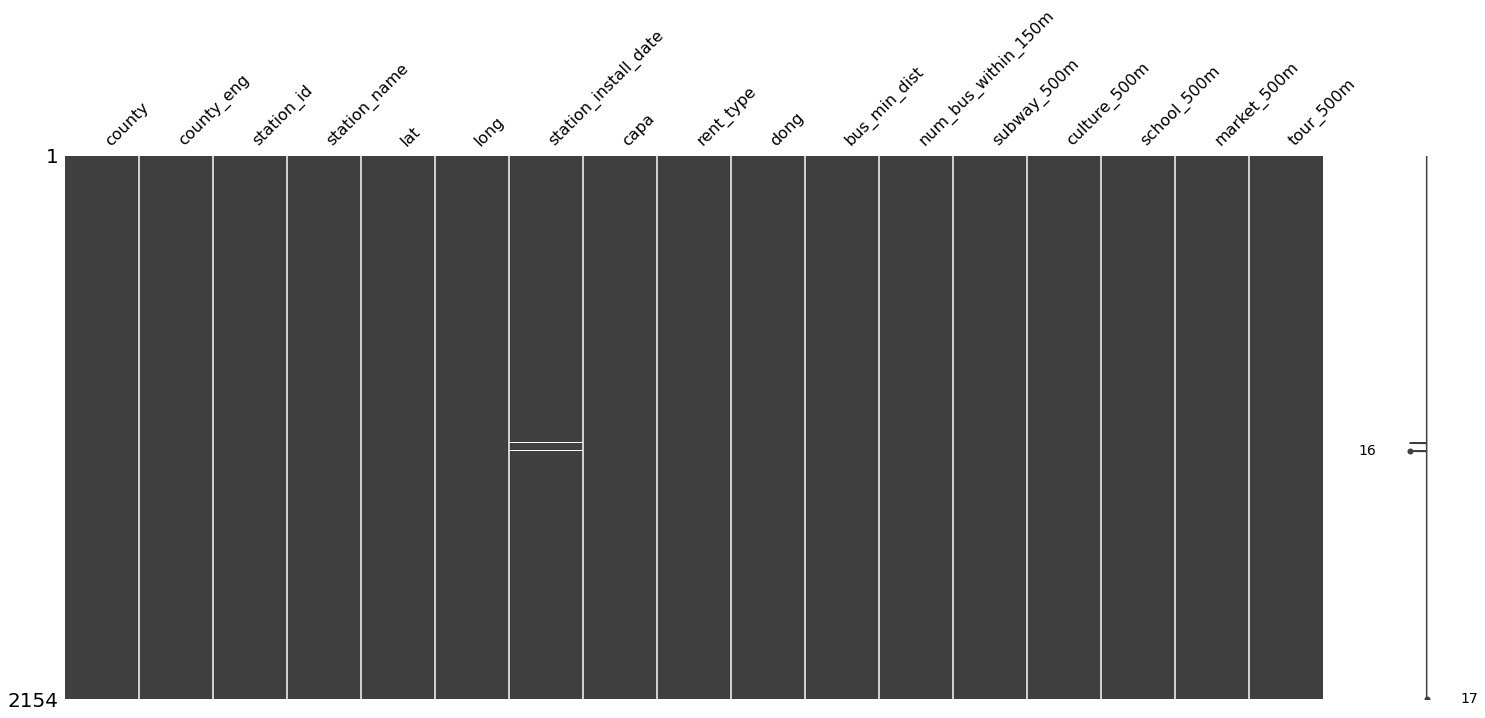

In [9]:
import missingno as msno
msno.matrix(station)

In [13]:
station.head()

,county,county_eng,station_id,station_name,lat,long,station_install_date,capa,rent_type,dong,bus_min_dist,num_bus_within_150m,subway_500m,culture_500m,school_500m,market_500m,tour_500m
0,도봉구,Dobong,1702,녹천역 1번출구 앞,37.646172,127.050560,5/8/2017,10,LCD,번1동,65.854878,1,1,0,5,0,0
1,도봉구,Dobong,1703,도봉산광역환승센터앞,37.689720,127.045197,5/11/2017,15,LCD,창1동,62.015531,6,2,0,1,0,1
2,도봉구,Dobong,1705,도봉구청 정문앞,37.669224,127.046516,5/8/2017,8,LCD,도봉1동,30.788507,5,1,1,2,0,1
3,도봉구,Dobong,1706,기업은행 앞,37.665665,127.042671,6/27/2017,10,LCD,방학1동,33.531927,4,1,1,1,0,3
4,도봉구,Dobong,1707,도봉구민회관,37.654461,127.038513,5/8/2017,15,LCD,방학1동,31.866318,5,0,6,5,0,2


In [14]:
station.groupby('county_eng').sum('capa').sort_values('capa', ascending = False)

,station_id,lat,long,capa,bus_min_dist,num_bus_within_150m,subway_500m,culture_500m,school_500m,market_500m,tour_500m
county_eng,,,,,,,,,,,
Gangseo,313032,5708.870020,19279.221438,2029,14335.247912,374,116,179,410,0,98
Songpa,242126,4987.700654,16906.729848,1770,13890.120452,271,109,381,313,0,203
Seocho,286677,4572.936062,15496.349498,1631,9768.673326,358,101,560,231,0,121
Yeongdeungpo,76999,4052.117010,13706.121171,1495,9473.748368,301,104,353,219,0,105
Gangnam,279031,4424.915281,14992.600265,1482,8797.613029,346,90,828,248,0,103
Mapo,68618,3831.216419,12945.339404,1310,6985.409621,346,131,875,217,0,213
Guro,207385,3411.842965,11544.434577,1184,7192.887467,288,49,125,224,0,70
Jongno,141248,3720.230674,12571.754638,1168,6061.243540,337,148,4134,247,0,736
Gangdong,90313,3153.916649,10680.255279,1152,6687.012388,214,53,102,221,0,124


In [15]:
station.groupby('county_eng').sum('capa').sort_values('capa', ascending = False).filter(['county_eng','capa'])

,capa
county_eng,
Gangseo,2029
Songpa,1770
Seocho,1631
Yeongdeungpo,1495
Gangnam,1482
Mapo,1310
Guro,1184
Jongno,1168
Gangdong,1152


In [16]:
bike_map = folium.Map(location=[station['lat'].mean(), station['long'].mean()], zoom_start=10.8, tiles='CartoDB positron')
for i, row in station.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=1,
        fill=True,
    ).add_to(bike_map)
bike_map

In [20]:
bike_map = folium.Map(location=[station['lat'].mean(), station['long'].mean()], zoom_start=10.8, tiles='CartoDB positron')
plugins.HeatMap(station[['lat', 'long']].values.tolist(),
                        radius=10, blur=5
                        ).add_to(bike_map)
plugins.Fullscreen(positions='topright').add_to(bike_map)
bike_map

In [21]:
have_bikes = station.groupby('county').size()
have_bikes.sort_values(ascending=False, inplace=True)

In [23]:
bike_map = folium.Map(location=[station['lat'].mean(), station['long'].mean()], zoom_start=10, tiles='cartodbpositron')
folium.Choropleth(geo_data=geo_str,
                  data=have_bikes,
                  key_on='feature.properties.SIG_KOR_NM', 
                  fill_color='Blues').add_to(bike_map)
bike_map

In [26]:
have_bikes = station.groupby('county_eng').size()
have_bikes.sort_values(ascending=False, inplace=True)

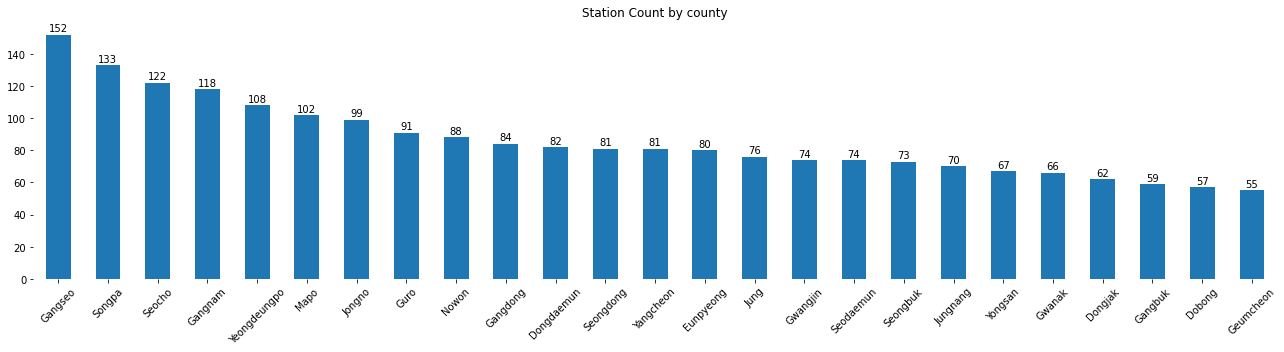

In [33]:
ax = have_bikes.plot(kind='bar', figsize=(18, 5), rot=0, title="Station Count by county")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.xlabel("")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

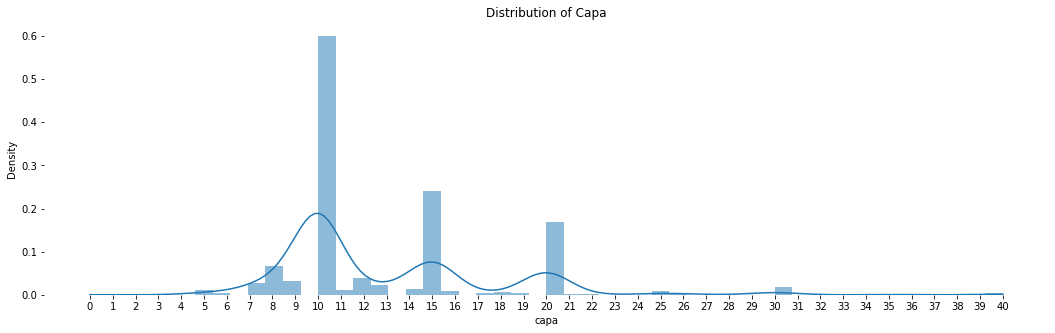

In [28]:
plt.figure(figsize=(18, 5))
sns.histplot(station['capa'], kde= True, stat = "density", linewidth = 0)
plt.title("Distribution of Capa")
plt.xticks(range(0, 41))
plt.box(False)
plt.show()

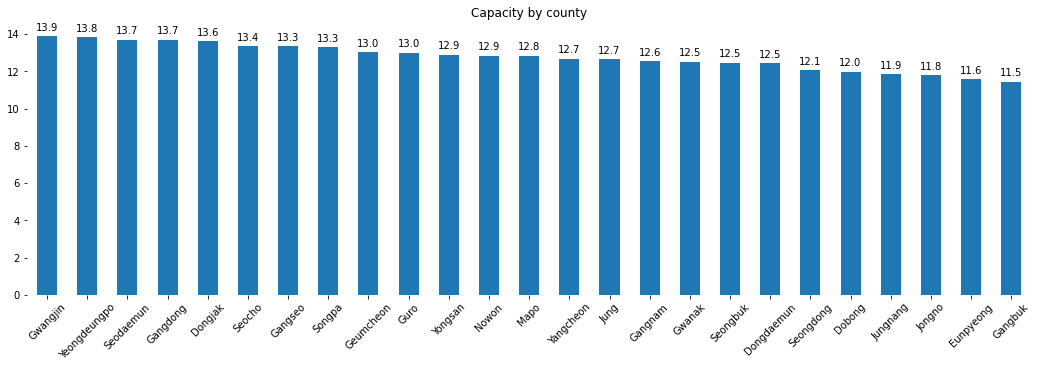

In [31]:
bike_rental = station.groupby('county_eng')['capa'].sum()
bike_rental = bike_rental / have_bikes
bike_rental.sort_values(ascending=False, inplace=True)

ax = bike_rental.plot(kind='bar', figsize=(18, 5), rot=0, title="Capacity by county")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.1f"%(height), (left+width/2, height+0.3), ha='center')
plt.box(False)
plt.xlabel("")
plt.xticks(rotation = 45)
plt.show()

In [39]:
station.head()

,county,county_eng,station_id,station_name,lat,long,station_install_date,capa,rent_type,dong,bus_min_dist,num_bus_within_150m,subway_500m,culture_500m,school_500m,market_500m,tour_500m
0,도봉구,Dobong,1702,녹천역 1번출구 앞,37.646172,127.050560,5/8/2017,10,LCD,번1동,65.854878,1,1,0,5,0,0
1,도봉구,Dobong,1703,도봉산광역환승센터앞,37.689720,127.045197,5/11/2017,15,LCD,창1동,62.015531,6,2,0,1,0,1
2,도봉구,Dobong,1705,도봉구청 정문앞,37.669224,127.046516,5/8/2017,8,LCD,도봉1동,30.788507,5,1,1,2,0,1
3,도봉구,Dobong,1706,기업은행 앞,37.665665,127.042671,6/27/2017,10,LCD,방학1동,33.531927,4,1,1,1,0,3
4,도봉구,Dobong,1707,도봉구민회관,37.654461,127.038513,5/8/2017,15,LCD,방학1동,31.866318,5,0,6,5,0,2


In [59]:
have_bikes = station.groupby('county').size()
have_bikes.sort_values(ascending=False, inplace=True)
bike_rental = station.groupby('county')['capa'].sum()
bike_rental = bike_rental / have_bikes
bike_rental.sort_values(ascending=False, inplace=True)

In [60]:
bike_map = folium.Map(location=[station['lat'].mean(), station['long'].mean()], zoom_start=10, tiles='cartodbpositron')
folium.Choropleth(geo_data=geo_str,
                  data=bike_rental,
                  key_on='feature.properties.SIG_KOR_NM', 
                  fill_color='Blues').add_to(bike_map)
bike_map

In [40]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    m = 1000 * km
    return m

In [41]:
dict_dists = {}
for name, df in station.groupby('county_eng'):
    dists = []
    for i, i_row in df.iterrows():
        min_dist = float('INF')
        
        for j, j_row in df.iterrows():
            if i == j:
                continue
            distance = haversine(i_row['long'], i_row['lat'], j_row['long'], j_row['lat'])       
            min_dist = distance if distance < min_dist else min_dist
                
        dists.append(min_dist)
    dict_dists[name] = dists

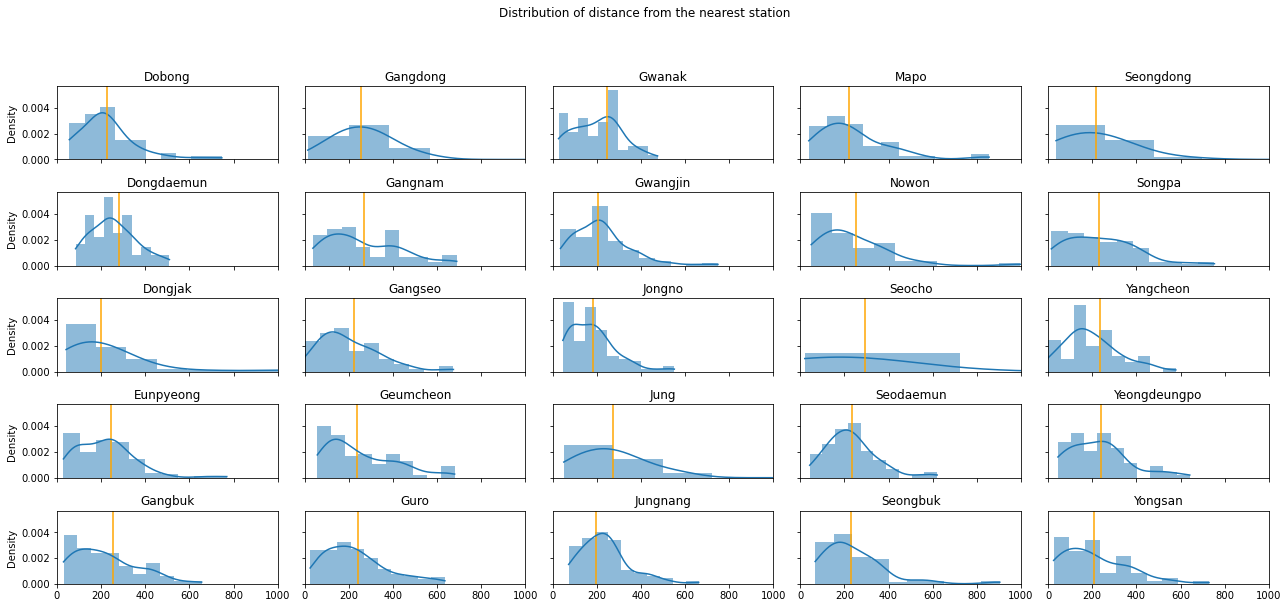

In [42]:
fig, axes = plt.subplots(5, 5, figsize=(18, 8), sharex=True, sharey=True)

i, j = 0, 0
for name, dists in dict_dists.items():
    #sns.histplot(station['capa'], kde= True, stat = "density", linewidth = 0)
    sns.histplot(dists, ax=axes[i][j], bins=10, kde=True, stat="density", linewidth = 0)
    axes[j][i].set_title(name)
    axes[j][i].axvline(np.array(dists).mean(), color='orange')
    j += 1
    if j >= 5:
        i += 1
        j = 0

fig.suptitle("Distribution of distance from the nearest station", y=1.05)
plt.xlim(0, 1000)
fig.tight_layout()
plt.show()

In [66]:
Gwanak = station[station['county'] == '서초구']

bike_map = folium.Map(location=[Gwanak['lat'].mean(), Gwanak['long'].mean()], zoom_start=14)
for i, row in Gwanak.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=5,
        fill=True,
    ).add_to(bike_map)
bike_map

plugins.HeatMap(Gwanak[['lat', 'long']].values.tolist()).add_to(bike_map)
bike_map

In [61]:
dist_means

Seocho          293.205695
Dongdaemun      282.918887
Jung            273.714589
Gangnam         267.353746
Gangdong        255.783610
Gangbuk         252.707058
Nowon           251.265067
Gwanak          248.837539
Eunpyeong       244.047262
Guro            242.724073
Yeongdeungpo    239.526153
Geumcheon       237.722193
Yangcheon       235.182389
Seodaemun       231.906794
Seongbuk        229.696257
Songpa          229.226437
Dobong          227.505134
Gangseo         220.896295
Seongdong       219.169743
Mapo            218.448022
Yongsan         209.510557
Gwangjin        204.221615
Dongjak         201.304535
Jungnang        197.911619
Jongno          181.491498
dtype: float64

In [62]:
bike_map = folium.Map(location=[station['lat'].mean(), station['long'].mean()], zoom_start=10.8, tiles='cartodbpositron')
folium.Choropleth(geo_data=geo_str,
                  data=dist_means,
                  key_on='feature.properties.SIG_KOR_NM', 
                  fill_color='Blues').add_to(bike_map)
bike_map

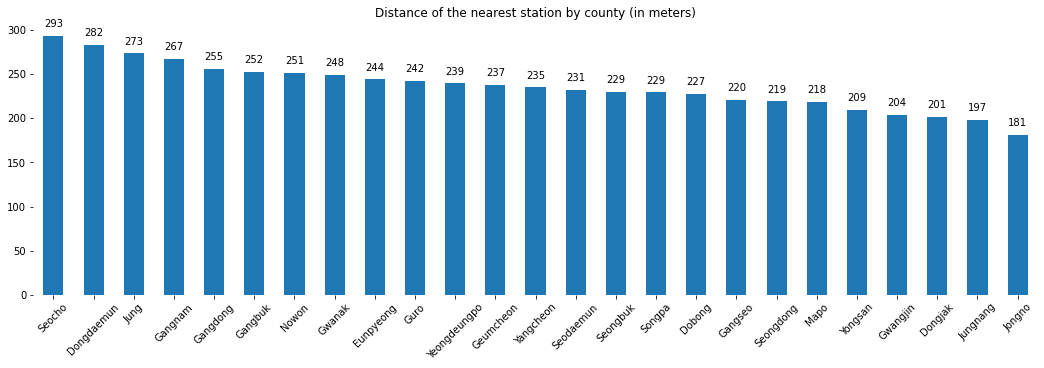

In [63]:
dist_means = {name: np.mean(dists) for name, dists in dict_dists.items() }
dist_means = pd.Series(dist_means)
dist_means.sort_values(ascending= False, inplace=True)

ax = dist_means.plot(kind='bar', figsize=(18, 5), rot=0, legend=False, title="Distance of the nearest station by county (in meters)")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+10), ha='center')
plt.xticks(rotation = 45)
plt.box(False)
plt.show()